In [1]:
# Setup
%pip install ultralytics>=8.3.185
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.11.0+cpu CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6563.3/8062.4 GB disk)


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="igSmTk7fHaCYptIm8oRY")
project = rf.workspace("myworkspace-suztz").project("seediqv2-ed0k8")
version = project.version(2)
dataset = version.download("yolov8")
                

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.7/58.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.6/55.6 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 22.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
Reason for being yanked: deprecated, use 4.8.0.76
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.0.9
    Uninstalling pyparsing-3.0.9:
      Successfully uninstalled pyparsing-3.0.9
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.5.4.60
    Uninstalling opencv-python-headless-4.5.4.60:
      Successfully uninstalled opencv-python-headles


Extracting Dataset Version Zip to SeedIQV2-2 in yolov8:: 100%|██████████| 112/112 [00:00<00:00, 4627.06it/s]


In [4]:
import yaml

# 1. Define the file path (The one causing the error)
yaml_file = '/kaggle/working/SeedIQV2-2/data.yaml'

# 2. Open the file and fix the broken paths
with open(yaml_file, 'r') as f:
    data = yaml.safe_load(f)

# Point directly to the folder where the files actually are
data['path'] = '/kaggle/working/SeedIQV2-2' 
data['train'] = '/kaggle/working/SeedIQV2-2/train'
data['val'] = '/kaggle/working/SeedIQV2-2/valid'
data['test'] = '/kaggle/working/SeedIQV2-2/test'

# 3. Save the fixed file
with open(yaml_file, 'w') as f:
    yaml.dump(data, f)

print(" Error Fixed!")

 Error Fixed!


In [5]:
from ultralytics import YOLO

model = YOLO('yolov8n.pt') 

model.train(
    data='/kaggle/working/SeedIQV2-2/data.yaml', 
    epochs=50,
    imgsz=640
)

New https://pypi.org/project/ultralytics/8.3.232 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.11.0+cpu CPU (Intel Xeon 2.20GHz)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/SeedIQV2-2/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, 

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

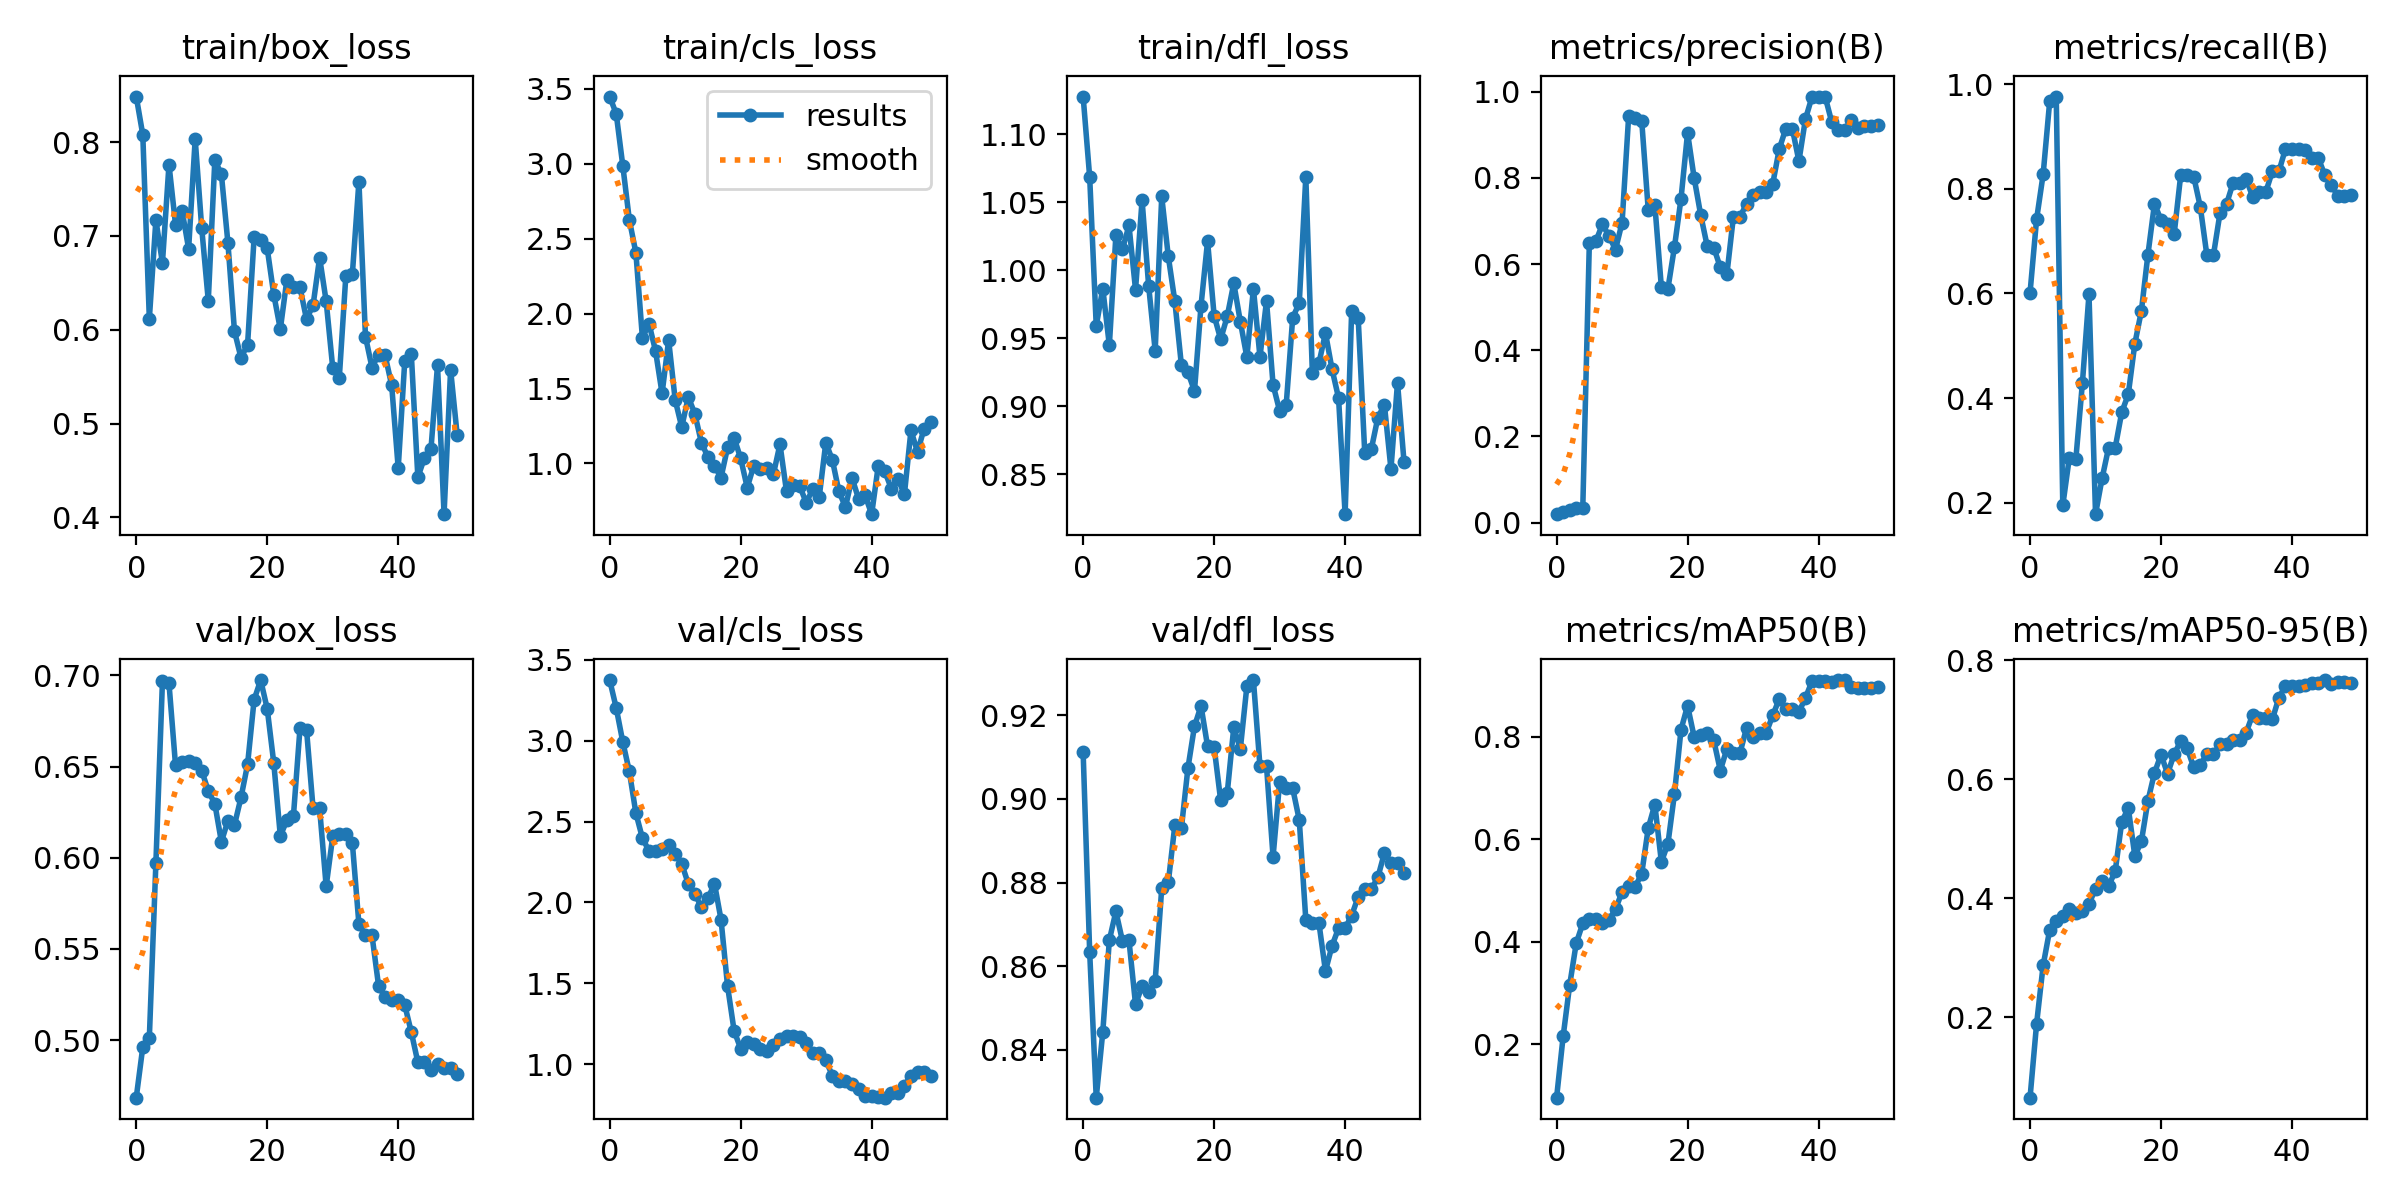

In [7]:
from IPython.display import Image
# Display the results graph
Image(filename=f'/kaggle/working/runs/detect/train2/results.png')


image 1/1 /kaggle/working/SeedIQV2-2/test/images/Copy-of-IMG_20251124_170440_jpg.rf.95310685e321a5bdc39c5367f196a6a7.jpg: 640x640 1 Grade_A, 10 Grade_Bs, 133.3ms
Speed: 7.9ms preprocess, 133.3ms inference, 4.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict2


Showing prediction for: /kaggle/working/SeedIQV2-2/test/images/Copy-of-IMG_20251124_170440_jpg.rf.95310685e321a5bdc39c5367f196a6a7.jpg


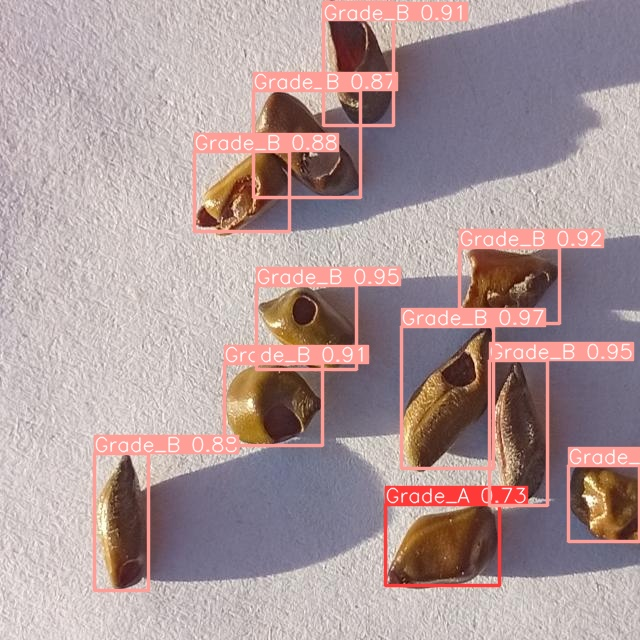

In [9]:
import glob
import random
from IPython.display import Image, display  # <--- Added 'display' here

# Get a random image
test_images = glob.glob('/kaggle/working/SeedIQV2-2/test/images/*.jpg') 

if test_images:
    random_image = random.choice(test_images)
    
    # Run the model
    results = model.predict(source=random_image, conf=0.25, save=True)
    
    # Show the result
    print(f"Showing prediction for: {random_image}")
    
    # Display image
    display(Image(filename=results[0].save_dir + '/' + random_image.split('/')[-1])) 
else:
    print("Could not find images. Check the folder name!")


image 1/1 /kaggle/input/real-test/IMG_20251020_111031.jpg: 512x640 1 Grade_A, 102.7ms
Speed: 3.7ms preprocess, 102.7ms inference, 0.8ms postprocess per image at shape (1, 3, 512, 640)
Results saved to runs/detect/predict6


Prediction for: /kaggle/input/real-test/IMG_20251020_111031.jpg


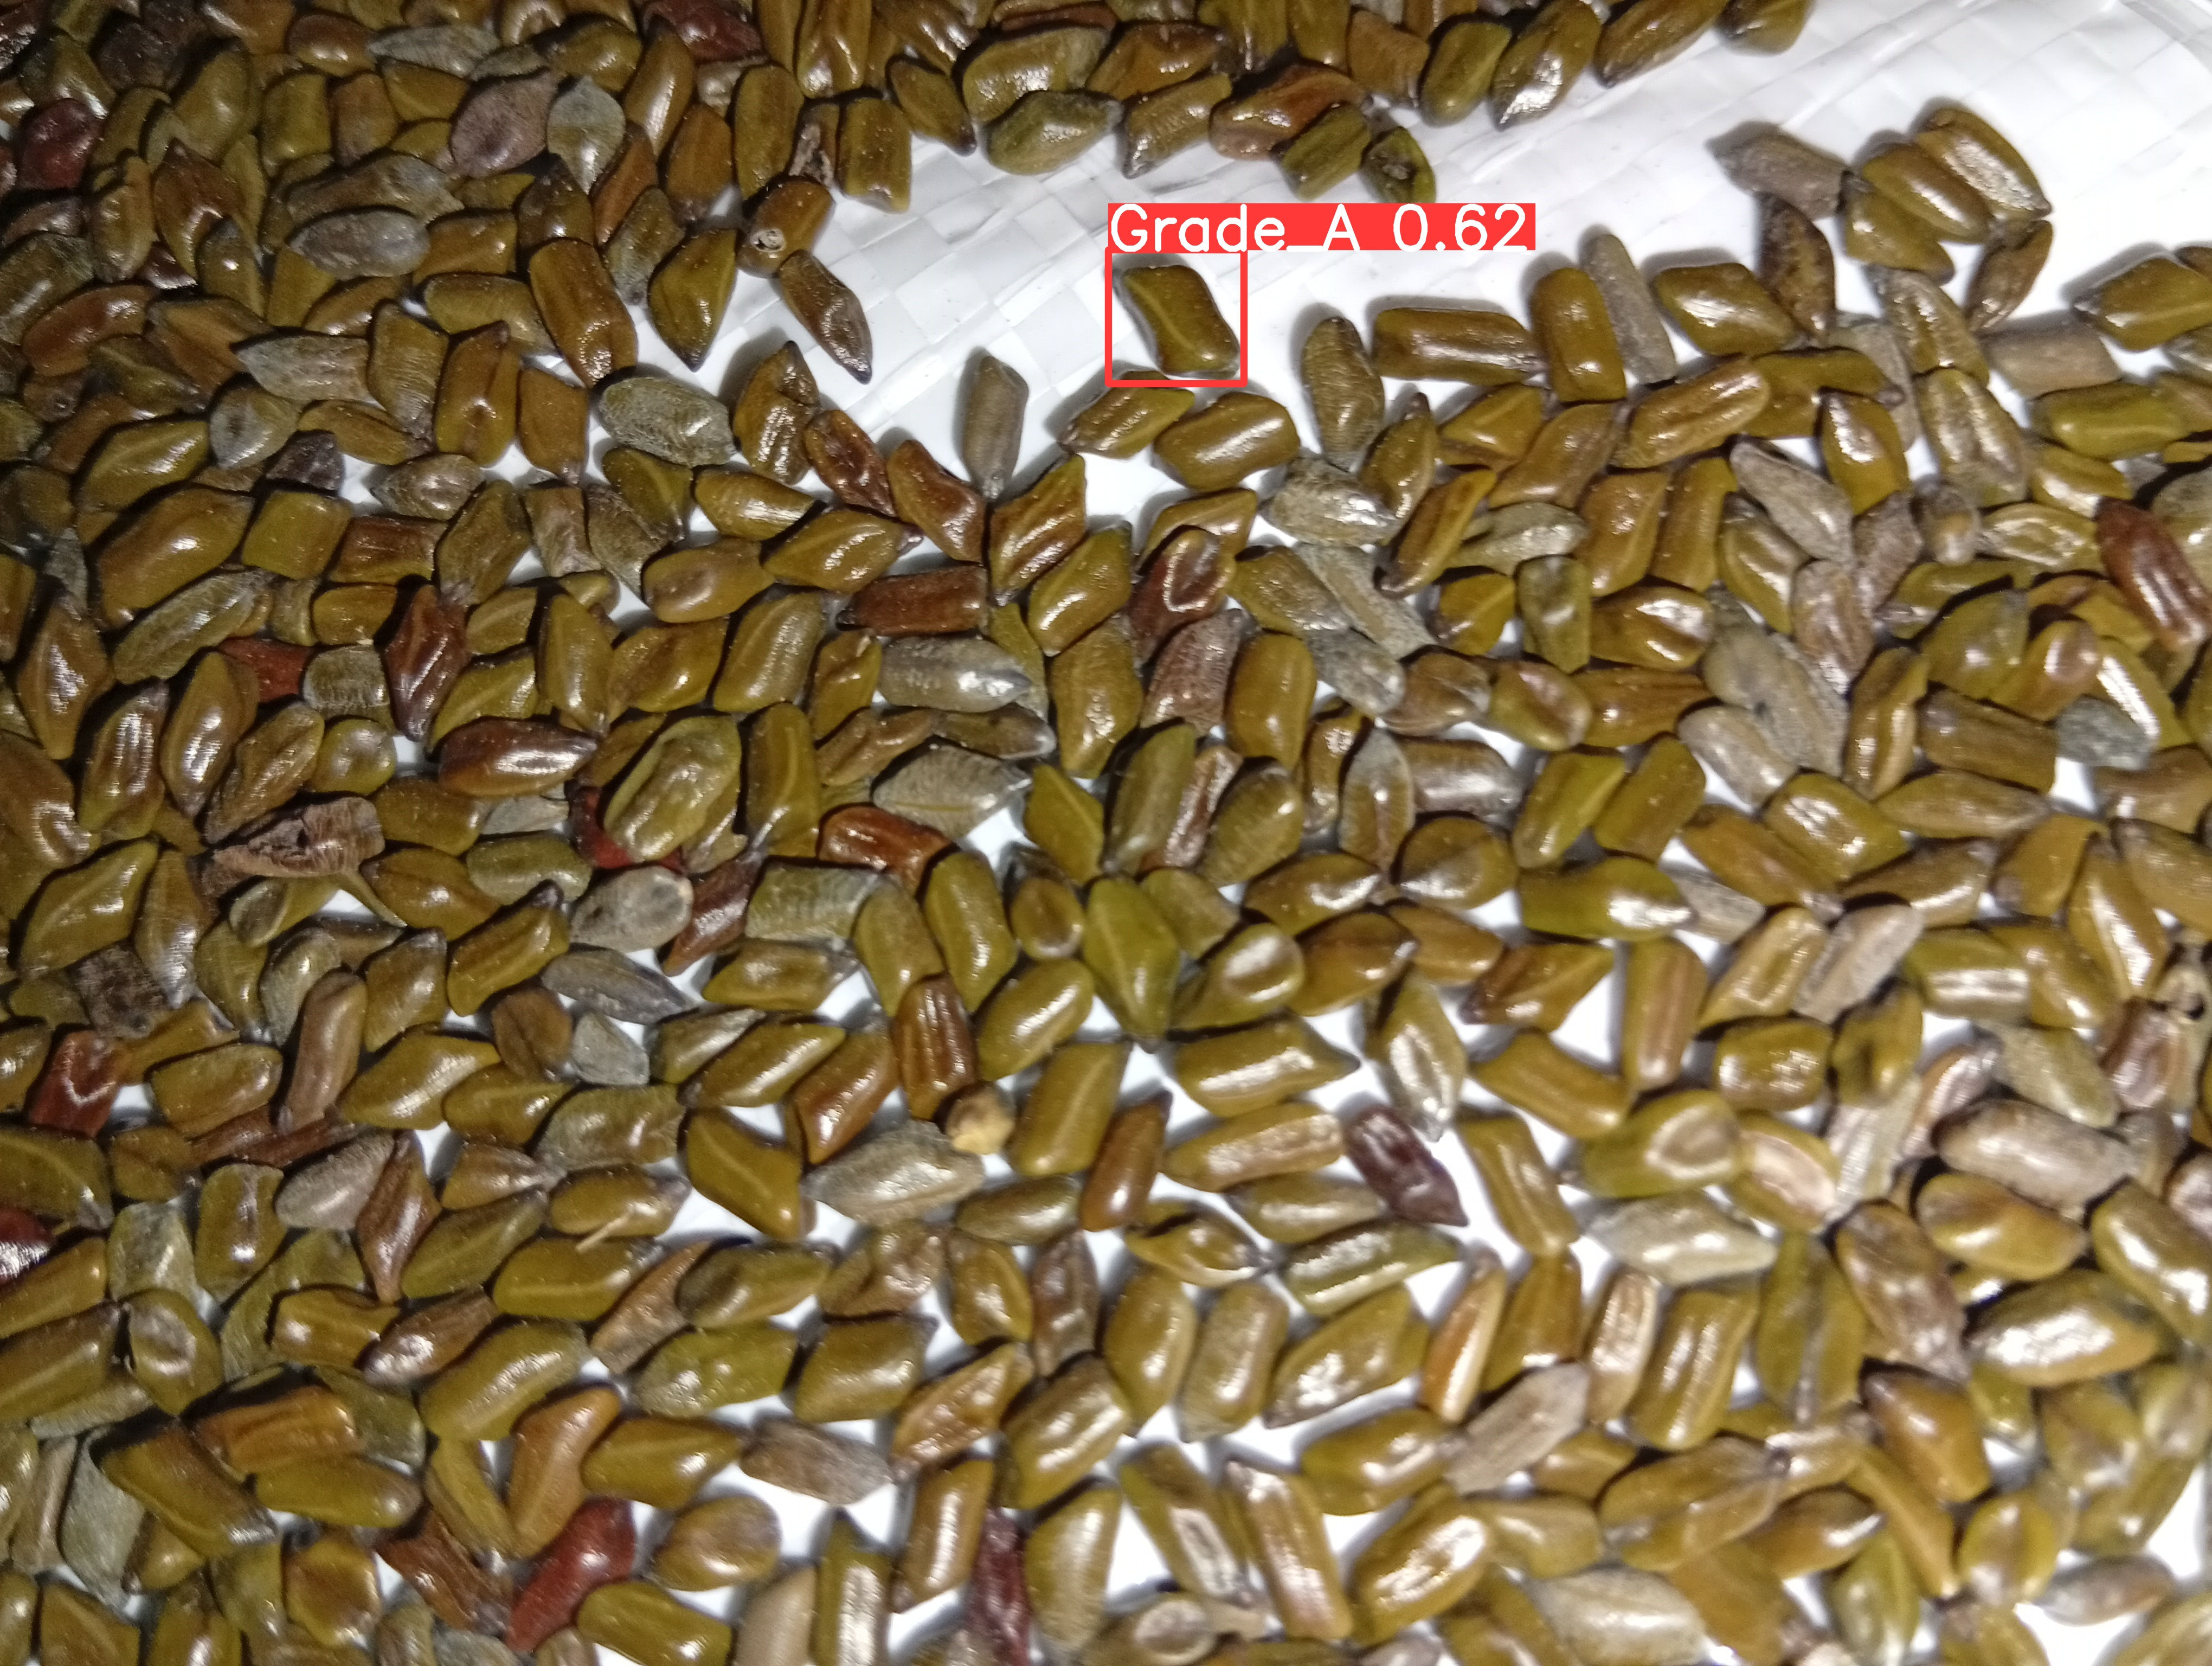

In [13]:
from ultralytics import YOLO
from IPython.display import Image, display

# 1. PASTE YOUR NEW IMAGE PATH HERE
# (It should look like '/kaggle/input/your-new-dataset/image.jpg')
real_world_image = '/kaggle/input/real-test/IMG_20251020_111031.jpg'

# 2. Run the Model
# We use conf=0.5 (50% confidence) to be strict with the "Real World"
results = model.predict(source=real_world_image, conf=0.50, save=True)

# 3. Show the Result
print(f"Prediction for: {real_world_image}")
display(Image(filename=results[0].save_dir + '/' + real_world_image.split('/')[-1]))